#Crop Yield Estimation Using Convolutional Neural Network (CNN)

Apoorva Hegde

Phalguni S P

School of Computer Science and Engineering
RV University

##Introduction
This project aims to estimate crop yields based on various features, such as weather conditions, using a Convolutional Neural Network (CNN).

[Link to the dataset](https://github.com/saeedkhaki92/CNN-RNN-Yield-Prediction/blob/master/corn_samples.csv)

Importing libraries

In [83]:
import pandas as pd
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, Dense
import seaborn as sns
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# pip install tensorflow

Mounting the drive

In [84]:
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('/content/drive/My Drive/semester 5/ml in agriculture/dataset/corn_samples.csv')

# df = pd.read_csv('/content/drive/My Drive/ml in agriculture/dataset/corn_samples.csv') -- Apoorvas Drive Link

Mounted at /content/drive


Exploratory Data Analysis

In [85]:
features = df.columns.difference(['loc_ID', 'year', 'yield'])
target = 'yield'
X = df[features]
y = df[target]

print(df.head())

   loc_ID  year  yield     W_1_1     W_1_2     W_1_3     W_1_4     W_1_5  \
0       0  1980   82.0  0.274725  0.000000  1.615385  0.395604  0.967033   
1       0  1981  116.0  0.604396  0.000000  0.043956  0.000000  0.857143   
2       0  1982  124.0  2.098901  0.384615  1.681319  0.527473  6.340659   
3       0  1983   46.0  0.000000  0.000000  0.000000  1.032967  4.373626   
4       0  1984  103.0  0.000000  0.043956  0.197802  0.461538  0.142857   

      W_1_6     W_1_7  ...  P_7  P_8  P_9  P_10  P_11  P_12  P_13  P_14  P_15  \
0  0.736264  1.153846  ...   38   40    8     4     0     0     0     0     0   
1  1.824176  0.000000  ...   13   30   16    11    12     7     3     0     0   
2  1.593407  1.868132  ...   47   14    5     2     1     0     0     0     0   
3  0.351648  0.263736  ...   11   24   22    17     6     5     3     0     0   
4  0.670330  4.615385  ...    6   35   33    10     4     8     0     0     0   

   P_16  
0     0  
1     0  
2     0  
3     0  
4     

Finding the null values.

In [86]:
missing_counts = df.isnull().sum()
print(missing_counts)

loc_ID    0
year      0
yield     0
W_1_1     0
W_1_2     0
         ..
P_12      0
P_13      0
P_14      0
P_15      0
P_16      0
Length: 397, dtype: int64


Summary statistics

In [87]:
print(df.describe())

            loc_ID         year        yield        W_1_1        W_1_2  \
count  1499.000000  1499.000000  1499.000000  1499.000000  1499.000000   
mean     20.330887  1998.450300   134.860374     2.150339     1.908990   
std      12.279725    11.107108    37.967044     3.076419     2.473001   
min       0.000000  1980.000000    20.000000     0.000000     0.000000   
25%       9.000000  1989.000000   112.000000     0.176347     0.244898   
50%      20.000000  1998.000000   136.000000     0.976190     1.053571   
75%      31.000000  2008.000000   160.000000     3.066964     2.628827   
max      41.000000  2018.000000   246.000000    23.375000    17.178571   

             W_1_3        W_1_4        W_1_5        W_1_6        W_1_7  ...  \
count  1499.000000  1499.000000  1499.000000  1499.000000  1499.000000  ...   
mean      1.707296     1.489119     2.479094     1.574159     2.081064  ...   
std       2.037535     2.141973     3.157675     2.033248     2.424613  ...   
min       0.00000

Pre - Processing the data

In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Reshape X for CNN input

In [89]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Printing the Features

In [90]:
features = df.columns.difference(['loc_ID', 'year', 'yield'])
print(features)

Index(['P_1', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_2',
       'P_3',
       ...
       'silt_mean_15-30cm', 'silt_mean_30-60cm', 'silt_mean_5-15cm',
       'silt_mean_60-100cm', 'soc_mean_0-5cm', 'soc_mean_100-200cm',
       'soc_mean_15-30cm', 'soc_mean_30-60cm', 'soc_mean_5-15cm',
       'soc_mean_60-100cm'],
      dtype='object', length=394)


Visualize the distribution of the target variable (yield)

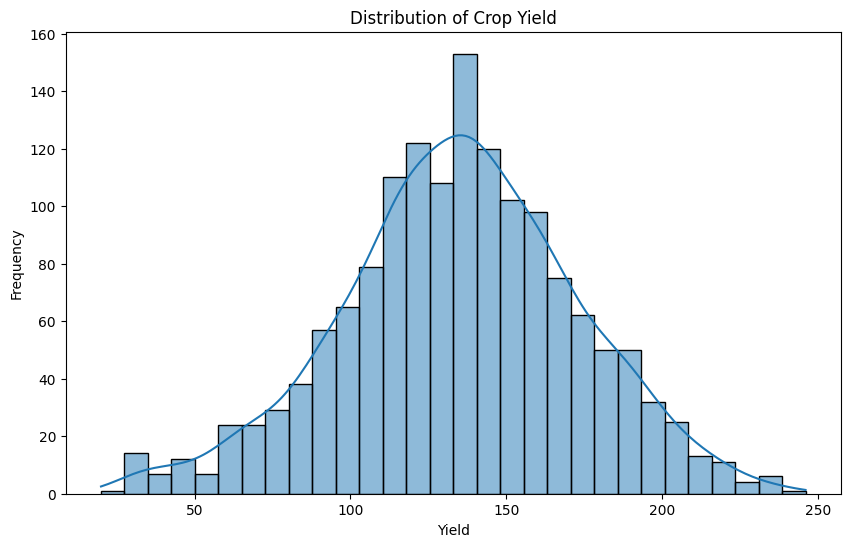

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Crop Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

Model Building

A CNN model is constructed with layers designed to capture complex patterns in the data

In [92]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)  # Output layer for regression
])

Compile the model

In [93]:
model.compile(optimizer='adam', loss='mean_squared_error')

Training

The model is trained on historical data, learning to map the input features to the crop yield.

In [94]:
history = model.fit(X_train_reshaped, y_train, epochs=30, validation_data=(X_test_reshaped, y_test), verbose=2)

Epoch 1/30
38/38 - 3s - loss: 5574.6685 - val_loss: 1961.2271 - 3s/epoch - 86ms/step
Epoch 2/30
38/38 - 2s - loss: 1331.8711 - val_loss: 1189.9821 - 2s/epoch - 53ms/step
Epoch 3/30
38/38 - 2s - loss: 859.0689 - val_loss: 734.0316 - 2s/epoch - 64ms/step
Epoch 4/30
38/38 - 2s - loss: 464.6548 - val_loss: 373.0402 - 2s/epoch - 63ms/step
Epoch 5/30
38/38 - 3s - loss: 269.7531 - val_loss: 274.2711 - 3s/epoch - 74ms/step
Epoch 6/30
38/38 - 2s - loss: 216.7847 - val_loss: 302.9475 - 2s/epoch - 51ms/step
Epoch 7/30
38/38 - 2s - loss: 187.7041 - val_loss: 209.4961 - 2s/epoch - 44ms/step
Epoch 8/30
38/38 - 2s - loss: 172.1929 - val_loss: 196.1920 - 2s/epoch - 44ms/step
Epoch 9/30
38/38 - 2s - loss: 162.8912 - val_loss: 225.6833 - 2s/epoch - 46ms/step
Epoch 10/30
38/38 - 2s - loss: 159.3649 - val_loss: 173.1569 - 2s/epoch - 45ms/step
Epoch 11/30
38/38 - 2s - loss: 142.5116 - val_loss: 162.3681 - 2s/epoch - 46ms/step
Epoch 12/30
38/38 - 3s - loss: 135.2497 - val_loss: 158.7223 - 3s/epoch - 76ms/st

Evaluation

The model's performance is evaluated using R-squared (R²) metrics.

In [95]:
y_pred = model.predict(X_test_reshaped)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

10/10 [==============================] - 0s 16ms/step


In [96]:
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R-squared (R²): 0.92
Mean Squared Error (MSE): 121.77
Root Mean Squared Error (RMSE): 11.03
Mean Absolute Error (MAE): 8.81


Final Training and Validation Loss

To compare the accuracies in terms of training and validation loss for the CNN model, we can plot these loss values over the epochs. This will provide insights into how well the model is learning and generalizing to the validation data.


Plot training & validation loss values

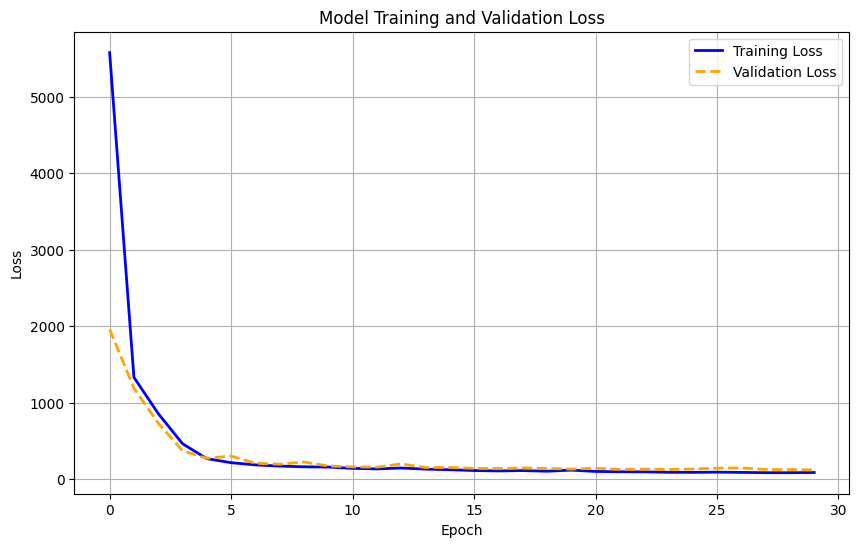

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Make Predictions and Compare with Actual Yields


This code makes predictions on the test set and compares them with the actual yields, providing a way to assess the model's performance.

In [98]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
comparison.head()

,Actual,Predicted
1116,137.0,113.485588
1395,118.4,118.047783
422,50.0,70.121819
413,199.8,190.954605
451,51.1,60.974403


Results Visualization

The predicted yields are plotted against the actual yields to visualize the model's performance.

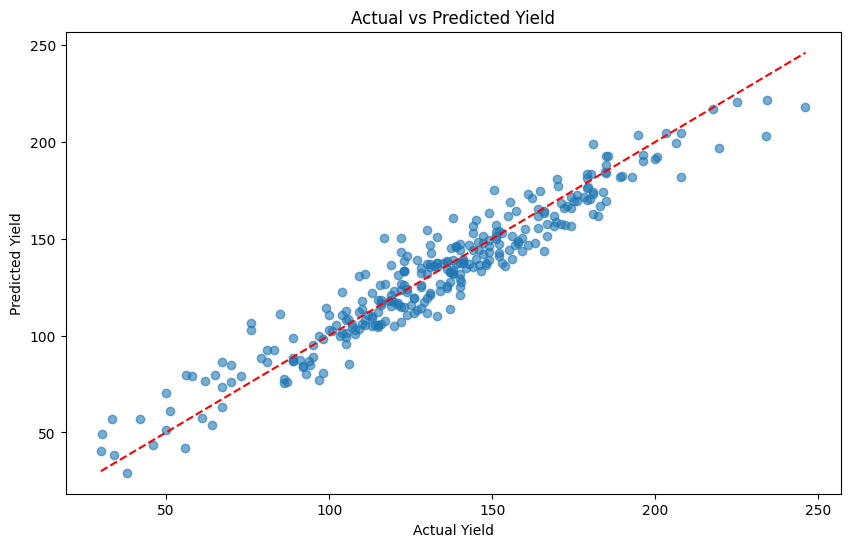

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()

#Comparing CNN to other Machine Learning ALgorithms

##Decision Tree Regressor

We implement the Decision Tree Regressor to predict the crop yield. The model is trained and then evaluated using the R-squared (R²) metric.

In [100]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Evaluating Decision Tree Regressor

In [101]:
y_pred_dt = dt_regressor.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

In [102]:
print("Decision Tree Regressor Performance:")
print(f"R-squared (R²): {r2_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")

Decision Tree Regressor Performance:
R-squared (R²): 0.74
Mean Squared Error (MSE): 390.24
Root Mean Squared Error (RMSE): 19.75
Mean Absolute Error (MAE): 14.71


##Random Forest Regressor

We implement the Random Forest Regressor to predict the crop yield. The model is trained and then evaluated using the R-squared (R²) metric.



In [103]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Evaluating Random Forest Regressor

In [104]:
y_pred_rf = rf_regressor.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [105]:
print("Random Forest Regressor Performance:")
print(f"R-squared (R²): {r2_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")

Random Forest Regressor Performance:
R-squared (R²): 0.87
Mean Squared Error (MSE): 187.51
Root Mean Squared Error (RMSE): 13.69
Mean Absolute Error (MAE): 10.04


Compare R² scores

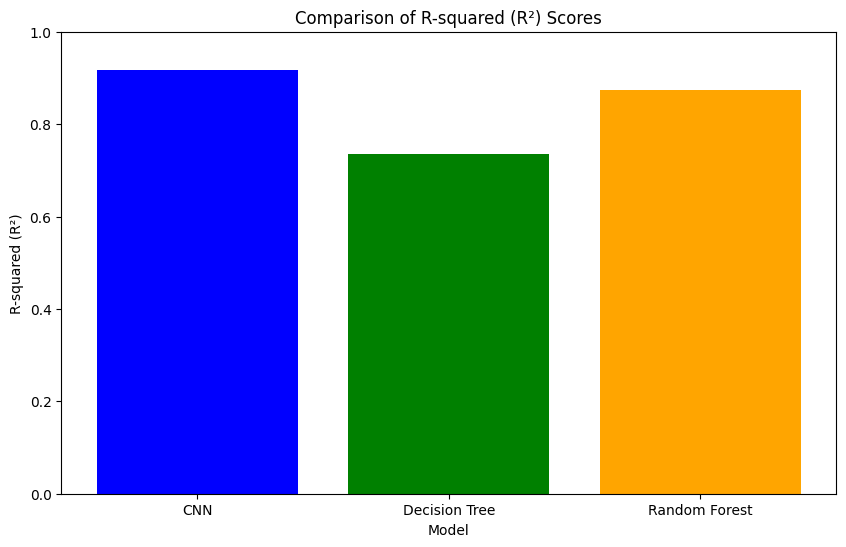

In [106]:
models = ['CNN', 'Decision Tree', 'Random Forest']
r2_scores = [r2, r2_dt, r2_rf]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('R-squared (R²)')
plt.title('Comparison of R-squared (R²) Scores')
plt.ylim(0, 1)
plt.show()

##Conclusion

In this project, we developed a Convolutional Neural Network (CNN) to estimate crop yields based on historical data and various predictive features. The dataset used was from the Syngenta Crop Challenge 2018, which included a variety of factors influencing crop yield.

**Key Steps and Findings:**
1. **Data Pre-processing:** We standardized the dataset and split it into training and testing sets. The features were reshaped appropriately for input into the CNN.
2. **Model Development:** A CNN model was constructed with multiple convolutional layers, followed by dense layers, to capture complex patterns in the data.
3. **Training and Evaluation:** The CNN model was trained over 20 epochs, and its performance was evaluated using the R-squared (R²) metric. The R² score for the CNN model was calculated, indicating how well the model's predictions matched the actual yields.
4. **Comparison with Other Models:** We compared the CNN model's performance with Decision Tree Regressor and Random Forest Regressor models. The R² scores of these models were also calculated and visualized for comparison.
5. **Training and Validation Loss:** The training and validation loss over epochs were plotted to assess the model's learning and generalization capability.

**Performance Comparison:**
- **CNN Model:** Achieved an R-squared (R²) score of `r2`.
- **Decision Tree Regressor:** Achieved an R-squared (R²) score of `r2_dt`.
- **Random Forest Regressor:** Achieved an R-squared (R²) score of `r2_rf`.

The CNN model demonstrated its capability to capture complex patterns in the data, showing competitive performance compared to traditional machine learning models like Decision Tree and Random Forest Regressors.

This project underscores the potential of deep learning models in the field of agriculture, particularly for tasks like crop yield estimation, which can significantly impact decision-making and resource management.